In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SampleName = "N704_3TP_K562_EL4_TNFA_NxSEQ_430cells_11Cy"

In [3]:
timetagdf = pd.read_table(SampleName+".aligned.sorted.merged.tagged.time_tags.csv", sep = "\t")
human_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.HUMAN_ONLY.dge.txt.gz")
human_vector=human_df.iloc[:,1:].sum()
mouse_df=pd.read_table(SampleName+".aligned.sorted.merged.tagged.MOUSE_ONLY.dge.txt.gz")
mouse_vector=mouse_df.iloc[:,1:].sum()

In [4]:
type(human_vector)

pandas.core.series.Series

In [5]:
human_transcript_df = pd.DataFrame({'CELL BARCODES':human_vector.index, 'HUMAN_COUNTS':human_vector.values})
display(human_transcript_df)
mouse_transcript_df = pd.DataFrame({'CELL BARCODES':mouse_vector.index, 'MOUSE_COUNTS':mouse_vector.values})
display(mouse_transcript_df)
combined_transcript_df = human_transcript_df.merge(mouse_transcript_df, on='CELL BARCODES')
display(combined_transcript_df)

,CELL BARCODES,HUMAN_COUNTS
0,CTGTCTCTTATA,92
1,GTCCCTTCTCCC,323
2,TACGGATTGCGT,5427
3,CCGCCGAGCCAG,8258
4,CCCCCTACAAAT,9447
...,...,...
1495,CTCAAAGTCCTT,200
1496,CTACGTCTTGGA,38
1497,TATGACTGTCTC,0
1498,CTCCCATTTTCC,262


,CELL BARCODES,MOUSE_COUNTS
0,CTGTCTCTTATA,71
1,GTCCCTTCTCCC,7933
2,TACGGATTGCGT,9375
3,CCGCCGAGCCAG,4710
4,CCCCCTACAAAT,203
...,...,...
1495,CTCAAAGTCCTT,81
1496,CTACGTCTTGGA,496
1497,TATGACTGTCTC,0
1498,CTCCCATTTTCC,34


,CELL BARCODES,HUMAN_COUNTS,MOUSE_COUNTS
0,CTGTCTCTTATA,92,71
1,GTCCCTTCTCCC,323,7933
2,TACGGATTGCGT,5427,9375
3,CCGCCGAGCCAG,8258,4710
4,CCCCCTACAAAT,9447,203
...,...,...,...
1495,CTCAAAGTCCTT,200,81
1496,CTACGTCTTGGA,38,496
1497,TATGACTGTCTC,0,0
1498,CTCCCATTTTCC,262,34


In [6]:
timetagdf

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG
0,TGCCTCTAGCCA,597,SEQ3_GGAA,0,1,593,0,1,0,1,0,0,0,1,0
1,TAGTTCCAGACT,266,SEQ1_TTGG,257,0,0,0,0,0,0,0,0,0,6,3
2,CATAAAGCGTGT,157,SEQ1_TTGG,151,0,0,0,0,0,0,0,0,0,0,6
3,AGATATAACTCA,4864,SEQ3_GGAA,4,0,4837,0,0,0,1,0,3,0,18,1
4,GGCCACAGATCG,58,SEQ2_CCTT,0,58,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241,CTGCATACTAAC,52,SEQ3_GGAA,0,0,52,0,0,0,0,0,0,0,0,0
20242,GGTACGCTCCAA,191,SEQ1_TTGG,190,0,0,0,0,0,0,0,0,0,0,1
20243,GCTCCCGCCTCC,52,SEQ3_GGAA,0,0,52,0,0,0,0,0,0,0,0,0
20244,AGTCCTCCCATT,23,SEQ2_CCTT,0,23,0,0,0,0,0,0,0,0,0,0


In [7]:
timetagdf=timetagdf[~timetagdf["FINAL TIME TAG"].str.contains("Collision Detected")] #Removing Cell Barcodes with Collision in Time-Tag Determination

In [8]:
Combined_df_for_plot = timetagdf.merge(combined_transcript_df, on = "CELL BARCODES")
#Combined_df_for_plot["BARCODES BELONGS"] = Combined_df_for_plot[['HUMAN_COUNTS', 
 #                                 'MOUSE_COUNTS']].idxmax(axis=1)
Combined_df_for_plot

,CELL BARCODES,TIME TAG COUNTS,FINAL TIME TAG,SEQ1_TTGG,SEQ2_CCTT,SEQ3_GGAA,SEQ4_TTCC,SEQ5_TTAA,SEQ6_TTTT,SEQ7_CCAA,SEQ8_CCGG,SEQ9_CCCC,SEQ10_GGTT,SEQ11_GGCC,SEQ12_GGGG,HUMAN_COUNTS,MOUSE_COUNTS
0,AGATATAACTCA,4864,SEQ3_GGAA,4,0,4837,0,0,0,1,0,3,0,18,1,4018,112
1,TTTCTACATCCC,5092,SEQ2_CCTT,2,4987,1,0,0,0,0,78,23,0,0,1,3757,102
2,AGCTCGCGGCGT,3667,SEQ1_TTGG,3438,7,3,1,0,0,3,8,29,0,8,170,2418,69
3,AGCAATCACCTA,473,SEQ3_GGAA,1,1,465,0,0,0,1,0,1,0,4,0,78,608
4,TAAGGAAGTCCT,4104,SEQ2_CCTT,0,4028,8,0,0,0,0,56,12,0,0,0,2978,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,CCATGAGCCGGC,672,SEQ1_TTGG,643,0,0,0,0,0,2,2,3,0,0,22,54,1086
1288,TACTTAGACTGC,810,SEQ2_CCTT,0,790,0,0,0,0,0,16,4,0,0,0,39,993
1289,ATGTGATTTCTA,338,SEQ1_TTGG,322,2,0,0,0,0,1,0,1,0,0,12,47,725
1290,ACGCACTTATTC,432,SEQ3_GGAA,0,1,431,0,0,0,0,0,0,0,0,0,27,559


In [9]:
Combined_df_for_plot["FINAL TIME TAG"].value_counts()

SEQ1_TTGG     538
SEQ2_CCTT     434
SEQ3_GGAA     319
SEQ10_GGTT      1
Name: FINAL TIME TAG, dtype: int64

In [10]:
Combined_df_for_plot[["CELL BARCODES","FINAL TIME TAG","HUMAN_COUNTS","MOUSE_COUNTS"]].to_csv("Species_Mixing_data.time_tags.csv",index=False)

Total cells: 1292
Low cells (< 500): 145
Remaining cells for analysis: 1147


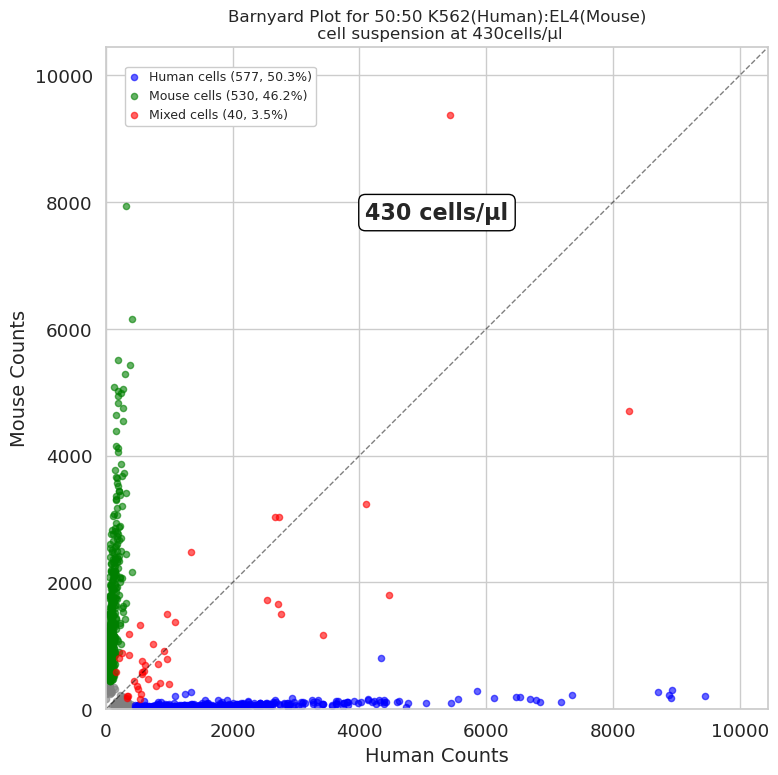


Category counts (filtered cells only):
human    577
mouse    530
mixed     40
Name: CATEGORY, dtype: int64
Total filtered cells: 1147
Low cells excluded: 145
Max count for symmetric limits: 10447


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set publication-quality style
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Load the data
df = pd.read_csv('Species_Mixing_data.time_tags.csv')

# Compute total transcripts
df['TOTAL_TRANSCRIPTS'] = df['HUMAN_COUNTS'] + df['MOUSE_COUNTS']

# Separate low cells (< 500 total transcripts) from analysis
low_cells = df[df['TOTAL_TRANSCRIPTS'] < 500].copy()
df_filtered = df[df['TOTAL_TRANSCRIPTS'] >= 500].copy()

print(f"Total cells: {len(df)}")
print(f"Low cells (< 500): {len(low_cells)}")
print(f"Remaining cells for analysis: {len(df_filtered)}")

# Define categories based on 20% threshold for mixed cells (only for filtered data)
def categorize_cell(row):
    total = row['TOTAL_TRANSCRIPTS']
    human = row['HUMAN_COUNTS']
    mouse = row['MOUSE_COUNTS']
    
    human_prop = human / total if total > 0 else 0
    mouse_prop = mouse / total if total > 0 else 0
    
    # Mixed cells: both human and mouse >= 20%
    if human_prop >= 0.20 and mouse_prop >= 0.20:
        return 'mixed'  # Red
    elif human_prop >= 0.80:  # Human dominant (>=80%)
        return 'human'  # Blue
    elif mouse_prop >= 0.80:  # Mouse dominant (>=80%)
        return 'mouse'  # Green
    else:
        # Edge case: one species 20-80%, other <20%
        return 'mixed'

df_filtered['CATEGORY'] = df_filtered.apply(categorize_cell, axis=1)
low_cells['CATEGORY'] = 'low'

# Compute counts and percentages for legend (percentages only for filtered cells)
total_filtered = len(df_filtered)
category_counts = df_filtered['CATEGORY'].value_counts()
human_count = category_counts.get('human', 0)
mouse_count = category_counts.get('mouse', 0)
mixed_count = category_counts.get('mixed', 0)
low_count = len(low_cells)

human_label = f'Human cells ({human_count}, {human_count/total_filtered*100:.1f}%)'
mouse_label = f'Mouse cells ({mouse_count}, {mouse_count/total_filtered*100:.1f}%)'
mixed_label = f'Mixed cells ({mixed_count}, {mixed_count/total_filtered*100:.1f}%)'

# Create color map
color_map = {'low': 'grey', 'human': 'blue', 'mouse': 'green', 'mixed': 'red'}

# Make the plot perfectly square with symmetric axes
max_count = max(df['HUMAN_COUNTS'].max(), df['MOUSE_COUNTS'].max())
axis_limit = max_count + 1000

fig, ax = plt.subplots(figsize=(8, 8))  # Square figure

# Plot low count cells first (grey, no legend entry)
if low_count > 0:
    ax.scatter(low_cells['HUMAN_COUNTS'], low_cells['MOUSE_COUNTS'], 
               c=color_map['low'], alpha=0.6, s=20)

# Plot filtered cells by category (only these will appear in legend)
for category in ['human', 'mouse', 'mixed']:
    subset = df_filtered[df_filtered['CATEGORY'] == category]
    if len(subset) > 0:
        if category == 'human':
            label = human_label
        elif category == 'mouse':
            label = mouse_label
        else:
            label = mixed_label
        
        ax.scatter(subset['HUMAN_COUNTS'], subset['MOUSE_COUNTS'], 
                   c=color_map[category], alpha=0.6, s=20, label=label)

# Set symmetric limits with padding (same scale on both axes)
ax.set_xlim(0, axis_limit)
ax.set_ylim(0, axis_limit)
ax.set_aspect('equal')  # Ensure perfect square scaling

# Add only diagonal reference line
ax.plot([0, axis_limit], [0, axis_limit], 'k--', alpha=0.5, linewidth=1)

# Add text box in upper middle section (moved slightly lower)
text_x = axis_limit * 0.5  # Middle of x-axis
text_y = axis_limit * 0.75  # Slightly lower position
ax.text(text_x, text_y, '430 cells/μl', 
        bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'),
        fontsize=16, ha='center', va='center',weight='bold')

# Labels and new multi-line title
ax.set_xlabel('Human Counts', fontsize=14)
ax.set_ylabel('Mouse Counts', fontsize=14)
ax.set_title('Barnyard Plot for 50:50 K562(Human):EL4(Mouse)\n cell suspension at 430cells/μl', fontsize=12)

# Even smaller legend box positioned inside top-left corner
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=9, 
          handlelength=0.8, borderpad=0.3, framealpha=1.0)

# Improve layout
plt.tight_layout()

# Save as high-resolution PNG and SVG for publication
plt.savefig('species_mixing_scatter_final.png', dpi=300, bbox_inches='tight')
plt.savefig('species_mixing_scatter_final.svg', bbox_inches='tight')

# Display the plot
plt.show()

# Print summary statistics
print("\nCategory counts (filtered cells only):")
print(category_counts)
print(f"Total filtered cells: {total_filtered}")
print(f"Low cells excluded: {low_count}")
print(f"Max count for symmetric limits: {axis_limit}")
